In [1]:
import json
import pandas as pd
import numpy as np
import _pickle as pickle
# Libraries
import pandas as pd
pd.set_option('display.max_colwidth', 500)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import _pickle as pickle
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [2]:
with open("data.json") as f:
        links = json.load(f)

raw_df = pd.DataFrame(links)
raw_df

,Name,About
0,Software Developer0,"I am an experienced Software Developer with over 10 years of experience in the field. I have a strong background in software engineering, design, and development. I have a deep understanding of software development processes and methodologies, and I am well-versed in a variety of programming languages and frameworks.I have a passion for creating innovative solutions to complex problems, and I am always looking for ways to improve the user experience. I am highly organized and detail-oriented..."
1,Software Developer1,"I am an experienced Software Developer with over 10 years of experience in the field. I have a strong background in developing software applications for a variety of platforms, including web, mobile, and desktop. I have a deep understanding of software development principles, including object-oriented programming, design patterns, and software architecture. I am also well-versed in a variety of programming languages, such as Java, C#, and JavaScript.I have a proven track record of delivering..."
2,Software Developer2,"I am an experienced Software Developer with over 10 years of experience in developing software solutions for a variety of industries. I have a deep understanding of software development principles and best practices, and I am comfortable working with a variety of programming languages, frameworks, and databases. I have a proven track record of delivering high-quality software solutions on time and on budget. I am an excellent problem solver and I am passionate about creating robust, reliable..."
3,Software Developer3,"I am an experienced software developer with over 10 years of experience in the field. I have a strong background in developing software solutions for a variety of industries, including finance, healthcare, and retail. I have a proven track record of success in developing software solutions that meet customer requirements and exceed expectations.I have a deep understanding of software development principles, including object-oriented programming, design patterns, and software architecture. I ..."
4,Software Developer4,"I am a highly experienced Software Developer with over 10 years of experience in the field. I am skilled in a variety of programming languages, including Java, C++, and Python. I have extensive experience developing both web and mobile applications, and I am comfortable working with a variety of frameworks and APIs. I have a deep understanding of software development best practices, such as software design patterns, test-driven development, and continuous integration. My experience also incl..."
...,...,...
1425,EMT5,"I am an experienced working professional in the Emergency Medical Technician field. With over 10 years of experience dedicated to providing emergency medical care for patients, I have an in-depth knowledge of the protocols and techniques necessary to provide a safe and effective response to emergency situations. My ability to manage multiple tasks and prioritize patient care in various emergency situations has allowed me to successfully handle a wide variety of medical emergencies. In additi..."
1426,EMT6,I am an experienced working professional in the Emergency Medical Technician (EMT) field. I have been working in this field for over five years and have gained a wealth of knowledge and experience. I am certified in both basic and advanced life support and have a strong understanding of the medical protocols and procedures that are necessary to provide quality care to patients. I am also knowledgeable in the use of medical equipment and have a strong understanding of the medical terminology ...
1427,EMT7,"I am an experienced working professional in the Emergency Medical Technician (EMT) field. I have been working in this field for the past five years and have developed a strong knowledge base of the medical field. My experience has included working in both urban and rural settings, as well as in both hospital and non-hospi

In [3]:
# Exporting the complete DF
with open("profiles33.pkl", "wb") as fp:
    pickle.dump(raw_df, fp)

In [4]:
# Instantiating the Scaler
scaler = MinMaxScaler()
# Instantiating the Vectorizer, experimenting with both
#vectorizer = CountVectorizer()
vectorizer = TfidfVectorizer(stop_words='english')

# Fitting the vectorizer to the Bios
x = vectorizer.fit_transform(raw_df['About'])

# Creating a new DF that contains the vectorized words
df_wrds = pd.DataFrame(x.toarray(), columns=vectorizer.get_feature_names_out())

# Concating the words DF with the original DF
new_df = pd.concat([raw_df, df_wrds], axis=1)

# Dropping the Bios because it is no longer needed in place of vectorization
new_df.drop(columns=['Name','About'], axis=1, inplace=True)

In [5]:
new_df

,10,100,15,20,2016,2fa,30,3d,3pls,3rd,...,yielded,young,youtube,z1000,zephyr,zero,zoned,zoning,zoonotic,zoos
0,0.058591,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.051772,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.057966,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.043969,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.052391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1425,0.029191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1426,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1427,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1428,0.037633,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Instantiating PCA
pca = PCA()

# Fitting and Transforming the DF
df_pca = pca.fit_transform(new_df)

In [7]:
# Setting the amount of clusters to test out
cluster_cnt = [i for i in range(2, 20, 1)]

# Establishing empty lists to store the scores for the evaluation metrics
s_scores = []

db_scores = []

# Looping through different iterations for the number of clusters
for i in cluster_cnt:
    
    # Hierarchical Agglomerative Clustering with different number of clusters
    hac = AgglomerativeClustering(n_clusters=i)
    
    hac.fit(df_pca)
    
    cluster_assignments = hac.labels_
    
    ## KMeans Clustering with different number of clusters
    '''k_means = KMeans(n_clusters=i)
    
    k_means.fit(df_pca)
    
    cluster_assignments = k_means.predict(df_pca)'''
    
    # Appending the scores to the empty lists    
    s_scores.append(silhouette_score(df_pca, cluster_assignments))
    
    db_scores.append(davies_bouldin_score(df_pca, cluster_assignments))

Max Value:
Cluster #     Cluster Score
19       0.056241

Min Value:
Cluster #    Cluster Score
3       0.014686


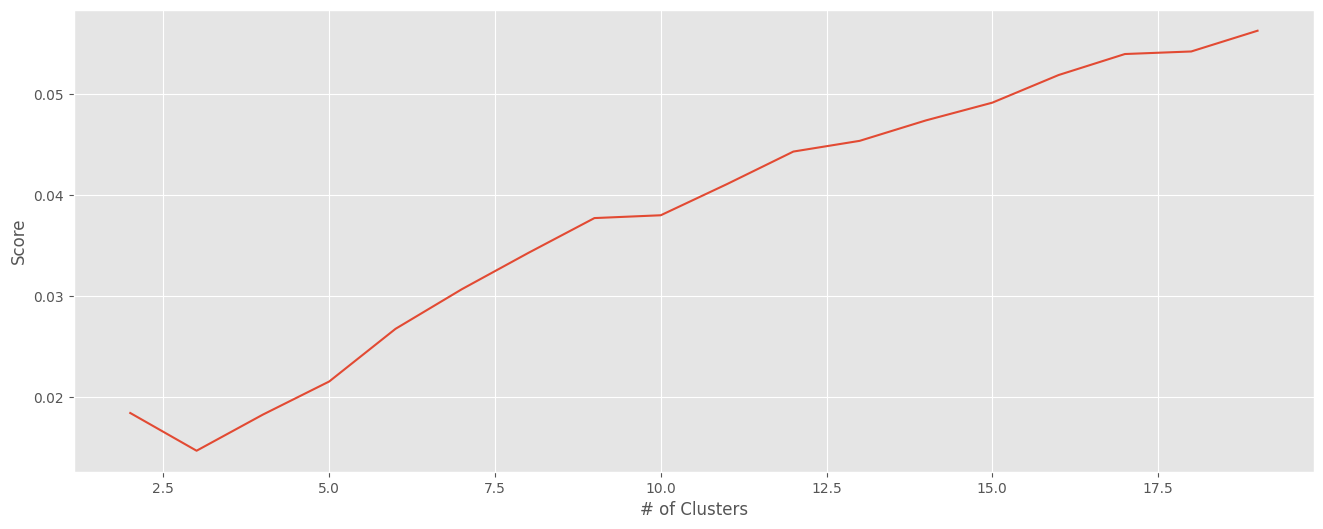

Max Value:
Cluster #    Cluster Score
5       5.790377

Min Value:
Cluster #    Cluster Score
2       3.598953


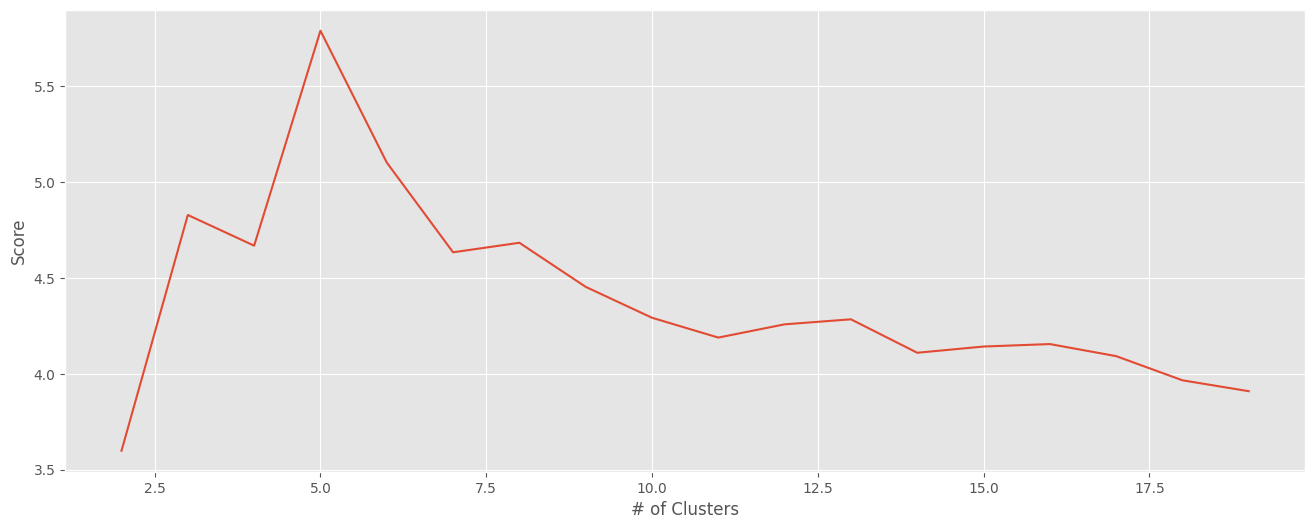

In [8]:
def plot_evaluation(y, x=cluster_cnt):
    """
    Plots the scores of a set evaluation metric. Prints out the max and min values of the evaluation scores.
    """
    
    # Creating a DataFrame for returning the max and min scores for each cluster
    df = pd.DataFrame(columns=['Cluster Score'], index=[i for i in range(2, len(y)+2)])
    df['Cluster Score'] = y
    
    print('Max Value:\nCluster #', df[df['Cluster Score']==df['Cluster Score'].max()])
    print('\nMin Value:\nCluster #', df[df['Cluster Score']==df['Cluster Score'].min()])
    
    # Plotting out the scores based on cluster count
    plt.figure(figsize=(16,6))
    plt.style.use('ggplot')
    plt.plot(x,y)
    plt.xlabel('# of Clusters')
    plt.ylabel('Score')
    plt.show()
    
# Running the function on the list of scores
plot_evaluation(s_scores)

plot_evaluation(db_scores)

In [9]:
# Instantiating HAC
hac = AgglomerativeClustering(n_clusters=19)

# Fitting
hac.fit(df_pca)

# Getting cluster assignments
cluster_assignments = hac.labels_

# Unscaling the categories then replacing the scaled values
df = raw_df[['About']]
# Assigning the clusters to each profile
df['Cluster #'] = cluster_assignments

# Viewing the dating profiles with cluster assignments
df

,About,Cluster #
0,"I am an experienced Software Developer with over 10 years of experience in the field. I have a strong background in software engineering, design, and development. I have a deep understanding of software development processes and methodologies, and I am well-versed in a variety of programming languages and frameworks.I have a passion for creating innovative solutions to complex problems, and I am always looking for ways to improve the user experience. I am highly organized and detail-oriented...",9
1,"I am an experienced Software Developer with over 10 years of experience in the field. I have a strong background in developing software applications for a variety of platforms, including web, mobile, and desktop. I have a deep understanding of software development principles, including object-oriented programming, design patterns, and software architecture. I am also well-versed in a variety of programming languages, such as Java, C#, and JavaScript.I have a proven track record of delivering...",9
2,"I am an experienced Software Developer with over 10 years of experience in developing software solutions for a variety of industries. I have a deep understanding of software development principles and best practices, and I am comfortable working with a variety of programming languages, frameworks, and databases. I have a proven track record of delivering high-quality software solutions on time and on budget. I am an excellent problem solver and I am passionate about creating robust, reliable...",9
3,"I am an experienced software developer with over 10 years of experience in the field. I have a strong background in developing software solutions for a variety of industries, including finance, healthcare, and retail. I have a proven track record of success in developing software solutions that meet customer requirements and exceed expectations.I have a deep understanding of software development principles, including object-oriented programming, design patterns, and software architecture. I ...",9
4,"I am a highly experienced Software Developer with over 10 years of experience in the field. I am skilled in a variety of programming languages, including Java, C++, and Python. I have extensive experience developing both web and mobile applications, and I am comfortable working with a variety of frameworks and APIs. I have a deep understanding of software development best practices, such as software design patterns, test-driven development, and continuous integration. My experience also incl...",9
...,...,...
1425,"I am an experienced working professional in the Emergency Medical Technician field. With over 10 years of experience dedicated to providing emergency medical care for patients, I have an in-depth knowledge of the protocols and techniques necessary to provide a safe and effective response to emergency situations. My ability to manage multiple tasks and prioritize patient care in various emergency situations has allowed me to successfully handle a wide variety of medical emergencies. In additi...",15
1426,I am an experienced working professional in the Emergency Medical Technician (EMT) field. I have been working in this field for over five years and have gained a wealth of knowledge and experience. I am certified in both basic and advanced life support and have a strong understanding of the medical protocols and procedures that are necessary to provide quality care to patients. I am also knowledgeable in the use of medical equipment and have a strong understanding of the medical terminology ...,15
1427,"I am an experienced working professional in the Emergency Medical Technician (EMT) field. I have been working in this field for the past five years and have developed a strong knowledge base of the medical field. My experience has included working in both urban and rural settings, as well as in both hospital and non-hospital settings. I have a comprehensive understanding of the medical protocols and procedures tha

In [10]:
import random

# Randomly choosing a cluster
rand_cluster = random.choice(df['Cluster #'].unique())

# Assigning the Cluster Profiles as a new DF
group = df[df['Cluster #']==rand_cluster].drop('Cluster #', axis=1)

## Vectorizing the Bios in the Selected Cluster

# Fitting the vectorizer to the Bios
cluster_x = vectorizer.fit_transform(group['About'])

# Creating a new DF that contains the vectorized words
cluster_v = pd.DataFrame(cluster_x.toarray(), index=group.index, columns=vectorizer.get_feature_names_out())

# Joining the vector DF and the original DF
group = group.join(cluster_v)

# Dropping the Bios because it is no longer needed in place of vectorization
group.drop('About', axis=1, inplace=True)


## Finding Correlations among the users

# Trasnposing the DF so that we are correlating with the index(users)
corr_group = group.T.corr()


## Finding the Top 10 Similar Users

# Randomly selecting a user
random_user = random.choice(corr_group.index)

print("Top 10 most similar users to User #", random_user, '\n')

# Creating a DF with the top 10 most similar users to the selected user
top_10_sim = corr_group[[random_user]].sort_values(by=[random_user],axis=0, ascending=False)[1:11]

# Printing out the results
print(top_10_sim)

print("\nThe most similar user to User #", random_user, "is User #", top_10_sim.index[0])

Top 10 most similar users to User # 632 

          632
637  0.557322
636  0.505673
638  0.496111
633  0.427304
630  0.424280
631  0.381763
639  0.342520
635  0.339100
634  0.333457
724  0.082783

The most similar user to User # 632 is User # 637


In [11]:
df.loc[top_10_sim.index]

,About,Cluster #
637,"I am an experienced working professional in the field of Blockchain Development. I have been working in this field for the past five years and have gained a great deal of knowledge and experience. My expertise lies in developing, deploying and managing blockchain-based applications. I have a deep understanding of the various components of blockchain technology, such as distributed ledgers, consensus algorithms, smart contracts, and cryptography. I am also well-versed in the development of de...",8
636,"I am an experienced Blockchain Developer with a passion for developing innovative solutions to complex problems. I have a strong background in distributed ledger technology, cryptography, and smart contract development. I have a deep understanding of the blockchain technology stack, including consensus algorithms, distributed storage, and distributed computing. I am experienced in developing and deploying blockchain applications on various platforms, including Ethereum, Hyperledger Fabric, a...",8
638,"I am an experienced Blockchain Developer with a passion for developing innovative solutions that leverage the power of distributed ledger technology. I have a deep understanding of the underlying principles of blockchain technology, including cryptography, consensus algorithms, and smart contracts. I am experienced in developing blockchain-based applications, such as decentralized applications (dApps) and distributed ledgers. I have a strong background in software development and have worked...",8
633,"I am an experienced Blockchain Developer with a passion for developing innovative solutions for the blockchain industry. I have extensive experience in developing distributed ledger technology, smart contracts, and other blockchain-related applications. I have a strong understanding of the blockchain technology stack, including consensus algorithms, cryptography, and distributed systems. I am also well-versed in the development of decentralized applications and have experience in developing ...",8
630,"I am an experienced Blockchain Developer with a passion for developing innovative solutions that leverage the power of distributed ledger technology. I have a strong background in software engineering, cryptography, and distributed systems, and I am well-versed in the fundamentals of blockchain technology. I have a proven track record of developing secure, reliable, and scalable blockchain applications that meet the needs of my clients.I have a deep understanding of the various blockchain pl...",8
631,"I am an experienced Blockchain Developer with a passion for developing innovative solutions to complex problems. I have a strong background in distributed ledger technology, cryptography, and smart contract development. I have a deep understanding of the blockchain technology stack, including consensus algorithms, distributed storage, and distributed computing. I have experience in developing and deploying blockchain applications, and I am well-versed in the development of decentralized appl...",8
639,"I am an experienced working professional in the field of Blockchain Development. I have been developing and maintaining distributed ledger systems since 2016. I have extensive experience in Ethereum, Hyperledger, and other blockchain technologies. I have a strong understanding of the blockchain architecture, cryptography, distributed systems, and consensus algorithms. I have experience in designing, developing and deploying smart contracts, distributed applications and user-facing applicatio...",8
635,"I am an experienced Blockchain Developer with a passion for developing innovative solutions to complex problems. I have a strong background in distributed ledger technology, cryptography, and smart contract development. I have a deep understanding of the underlying technology and protocols that make up the blockchain, and I am well-versed in the development of decentralized applications. I am also experienced in develo

In [12]:
df.loc[random_user]

About        I am an experienced working professional with a strong background in the blockchain development field. I have a proven track record of developing, deploying and managing blockchain-based applications and services. I have a deep understanding of the technical aspects of blockchain technology and the associated protocols. I have experience in developing, deploying and managing distributed ledgers, smart contracts, and distributed applications. Additionally, I have experience in researching and...
Cluster #                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [13]:
with open("profiles33.pkl", 'rb') as fp:
        raw_df = pickle.load(fp)

print(raw_df.index[-1])

profile1={
    "Name":[],
    "About": []}


print("Enter new profile information...\n\nExample Bio:\nBacon enthusiast. Falls down a lot. Freelance social media fan. Infuriatingly humble introvert.")

# Asking for new profile data
profile1['Name'].append(input("Enter a Name: "))
profile1['About'].append(input("Enter a Bio for yourself: "))

new_profile = pd.DataFrame(profile1)

# Indexing that new profile data
new_profile.index = [raw_df.index[-1] + 1]

# Appending the new data
new_cluster = raw_df.append(new_profile)

df=new_cluster['About']
x = vectorizer.fit_transform(df)

# Creating a new DF that contains the vectorized words
df_wrds = pd.DataFrame(x.toarray(), columns=vectorizer.get_feature_names_out())

# Concating the words DF with the original DF
new_df = pd.concat([df, df_wrds], axis=1)

# Dropping the About because it is no longer needed in place of vectorization
new_df.drop('About', axis=1, inplace=True)


# I want a data scientist with minimum 5 years of experiexe as a mentor.
## PCA
# Importing the library

# Instantiating PCA
pca = PCA()

# Fitting and Transforming the DF
df_pca = pca.fit_transform(new_df)
cluster_cnt = [i for i in range(2, 20, 1)]

# Establishing empty lists to store the scores for the evaluation metrics
s_scores = []

db_scores = []

# Looping through different iterations for the number of clusters
for i in (cluster_cnt):

    # Clustering with different number of clusters
    hac = AgglomerativeClustering(n_clusters=i)
    hac.fit(df_pca)
    cluster_assignments = hac.labels_
    # Appending the scores to the empty lists
    s_scores.append(silhouette_score(df_pca, cluster_assignments))
    db_scores.append(davies_bouldin_score(df_pca, cluster_assignments))


def cluster_eval(y, x):
    # Creating a DataFrame for returning the max and min scores for each cluster
    df = pd.DataFrame(columns=['Cluster Score'], index=[i for i in range(2, len(y)+2)])
    df['Cluster Score'] = y
    print('Max Value:\nCluster #',
          df[df['Cluster Score'] == df['Cluster Score'].max()])
    print('\nMin Value:\nCluster #',
          df[df['Cluster Score'] == df['Cluster Score'].min()])


print("\nThe Silhouette Coefficient Score (find max score):")
cluster_eval(s_scores, cluster_cnt)

print("\nThe Davies-Bouldin Score (find minimum score):")
cluster_eval(db_scores, cluster_cnt)

# Instantiating HAC
hac = AgglomerativeClustering(n_clusters=19)

# Fitting
hac.fit(df_pca)

# Getting cluster assignments
cluster_assignments = hac.labels_
# Unscaling the categories then replacing the scaled values
df = new_cluster
# Assigning the clusters to each profile
df['Cluster #'] = cluster_assignments

# Viewing the dating profiles with cluster assignments
#df

1429
Enter new profile information...

Example Bio:
Bacon enthusiast. Falls down a lot. Freelance social media fan. Infuriatingly humble introvert.
Enter a Name: kk
Enter a Bio for yourself: Aircraft Maintanence Engineer, 7 years experience , Aviation Department


/tmp/ipykernel_123823/2878079336.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_cluster = raw_df.append(new_profile)



The Silhouette Coefficient Score (find max score):
Max Value:
Cluster #     Cluster Score
19        0.05644

Min Value:
Cluster #    Cluster Score
3       0.014665

The Davies-Bouldin Score (find minimum score):
Max Value:
Cluster #    Cluster Score
5        5.78988

Min Value:
Cluster #    Cluster Score
2       3.599042


In [14]:
## Finding the Exact Cluster for our New Profile
# Getting the Cluster # for the new profile
profile_cluster = df.loc[new_profile.index]['Cluster #'].values[0]

# Using the Cluster # to narrow down the DF
profile_df = df[df['Cluster #'] == profile_cluster].drop('Cluster #', axis=1)

#print(profile_df)
## Vectorizing
# Fitting the vectorizer to the About
cluster_x = vectorizer.fit_transform(profile_df['About'])

# Creating a new DF that contains the vectorized words
cluster_v = pd.DataFrame(cluster_x.toarray(), index=profile_df.index, columns=vectorizer.get_feature_names_out())

# Joining the Vectorized DF to the previous DF
profile_df = profile_df.join(cluster_v).drop(columns=['Name','About'], axis=1)


## Correlation
# Trasnposing the DF so that we are correlating with the index(users) and finding the correlation
corr = profile_df.T.corr()
#corr= cosine_similarity(profile_df)#, profile_df)

# Finding the Top 10 similar or correlated users to the new user
user_n = new_profile.index[0]

# Creating a DF with the Top 10 most similar profiles
top_10_sim = corr[[user_n]].sort_values(
    by=[user_n], axis=0, ascending=False)[1:11]

# Displaying the Top 10
print(raw_df.loc[top_10_sim.index])

                     Name  \
1270   Aircraft Mechanic0   
1277   Aircraft Mechanic7   
1347               Pilot7   
1346               Pilot6   
1274   Aircraft Mechanic4   
1275   Aircraft Mechanic5   
251   Aerospace Engineer1   
252   Aerospace Engineer2   
1276   Aircraft Mechanic6   
1271   Aircraft Mechanic1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    About  
1270  I am an experienced Aircraft Mechanic with over 10 years of experience in the aviation industry. I have a strong background in aircraft maintenance, repair, and overh